In [3]:
### Manual PCA Analysis
### BIOS 26211 Final Project
### Bruno Petrucci and Christian Porras

import numpy as np
import matplotlib.pyplot as plt

In [7]:
### First create some Reference Sequence just to test the code
Nucleotides = ['A', 'T', 'C', 'G']
ReferenceSequence = np.array(np.random.choice(Nucleotides, 10, p=[0.25, 0.25, 0.25, 0.25]))
# Of course it's unrealistic for both of them to be random but it's just for testing - this will be the reference

### Create some random sequence to compare
AnalysisSequence = np.array(np.random.choice(Nucleotides, 10, p=[0.25, 0.25, 0.25, 0.25]))

In [10]:
### Define the function that transforms the sequence into a PCA-ble matrix
def TransformSequence(Sequence, Reference):
    Transform = np.zeros(len(Sequence))
    for i in range(len(Transform)):
        if Sequence[i] != Reference[i]:
            Transform[i] = 1
        
    return Transform

In [11]:
### Test for the sequences generated above
print(ReferenceSequence)
print(AnalysisSequence)
TransformedSequence = TransformSequence(AnalysisSequence, ReferenceSequence)
print(TransformedSequence)

['T' 'T' 'C' 'G' 'G' 'C' 'C' 'G' 'G' 'A']
['C' 'T' 'T' 'G' 'T' 'G' 'G' 'G' 'A' 'G']
[1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]


In [14]:
### Generate a bunch of sequences to test the PCA analysis
SequencesGenerated = 10
Sequences = np.array([AnalysisSequence for i in range(SequencesGenerated)])

for i in range(1,SequencesGenerated):
    NewSequence = np.array(np.random.choice(Nucleotides, 10, p=[0.25, 0.25, 0.25, 0.25]))
    Sequences[:][:][i] = NewSequence

TransformedSequences = np.zeros((SequencesGenerated, len(AnalysisSequence)))

for i in range(SequencesGenerated):
    TransformedSequences[i,:] = TransformSequence(Sequences[i,:], ReferenceSequence)

print(TransformedSequences)

[[1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]]


[[ 0.01654915 -0.37927799]
 [-0.19866325  0.52377885]
 [-0.47565856 -0.0517868 ]
 [-0.38616086 -0.50248993]
 [-0.06178777  0.31318508]
 [ 0.39877617 -0.08999528]
 [ 0.14859388 -0.40619782]
 [ 0.05654139 -0.22271107]
 [ 0.59635633  0.00740398]
 [ 0.2028045   0.07609318]]
[0.32614387 0.21050486]


<function matplotlib.pyplot.show(*args, **kw)>

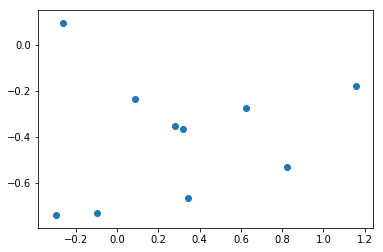

In [15]:
### Define PCA function (using code from my Lab 1)
def PCA(M, d, k):
    if (d == 0):
        Row = True
    elif (d == 1):
        Row = False
    else:
        return 0
    CovM = np.cov(M, rowvar = Row)
    eVals, eVecs = np.linalg.eig(CovM)
    CoefDet = eVals/sum(eVals)
    
    return eVecs[:,0:k], CoefDet[0:k]

PC, CoefDet = PCA(TransformedSequences, 0, 2)

print(PC)
print(CoefDet)

TransformedSequencesProj1 = TransformedSequences@PC[:, 0]
TransformedSequencesProj2 = TransformedSequences@PC[:, 1]

plt.scatter(TransformedSequencesProj1, TransformedSequencesProj2)
plt.show

In [11]:
A = np.array(range(500))
print(A[A % 100 == 0])

[  0 100 200 300 400]
